/var/folders/7g/6cvspph116v2yryvzpg936s00000gn/T/ipykernel_16539/1749164648.py:31: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ax.figure.show()


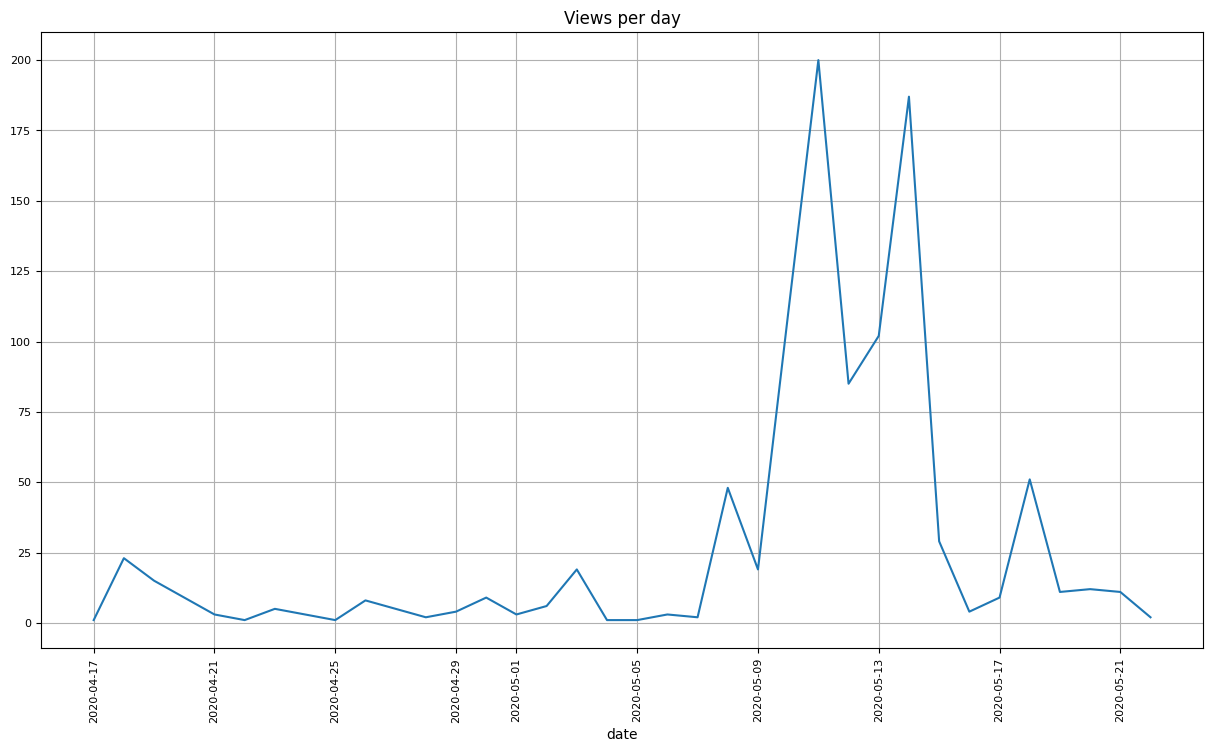

In [ ]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('../../datasets/data/checking-logs.sqlite')

query = """
SELECT datetime as view_date
FROM pageviews
WHERE uid LIKE 'user_%'
"""

df = pd.read_sql_query(query, conn)

df['view_date'] = pd.to_datetime(df['view_date'])
daily_views = df.groupby(df['view_date'].dt.date).size()

ax = daily_views.plot(
    kind='line', 
    figsize=(15, 8), 
    title='Views per day',
    rot=90,
    fontsize=8,
    grid=True,
)

ax.set_xlabel('date', fontsize=10)

conn.close()

ax.figure.show()